# COMP0164: Digital Finance
## Group Coursework

If you have set up an **`Anaconda`** environment, don't forget to activate it using:

> conda activate digital_finance_env

Below are the imports that you will need for the coursework:

In [8]:
import numpy as np
import pandas as pd
import numpy_financial as npf
from scipy import stats
import datetime

import yfinance as yf
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

import matplotlib.pyplot as plt
%matplotlib inline

<div class="alert alert-danger">
<b>WARNING: </b>

For question 5, you may want to use **pypfopt** package to construct the efficient frontier. If you use Python>=3.6, the plotting functionality of the **pypfopt** package may not work. Please use the function defined below to plot EfficientFrontier object.
</div>

In [2]:
import copy

def plot_efficient_frontier(ef: EfficientFrontier, points: int=100) -> None:
    fig, ax = plt.subplots()

    # Generate range of returns
    ef_minvol = copy.deepcopy(ef)
    ef_maxret = copy.deepcopy(ef)
    ef_minvol.min_volatility()
    min_ret = ef_minvol.portfolio_performance()[0]
    max_ret = ef_maxret._max_return()
    ef_param_range = np.linspace(min_ret, max_ret - 0.0001, points)

    # Plot efficient frontier from EfficientFrontier object
    mus, sigmas = [], []
    for param_value in ef_param_range:
        ef_i = copy.deepcopy(ef)
        try:
            ef_i.efficient_return(param_value)
        except:
            raise ValueError("pypfopt experiences problems with portfolio optimization.")
        ret, sigma, _ = ef_i.portfolio_performance()
        mus.append(ret)
        sigmas.append(sigma)
    
    # Generate axis and plot
    ax.plot(sigmas, mus, label="Efficient Frontier")
    ax.legend()
    ax.set_xlabel("Volatility")
    ax.set_ylabel("Return")
    plt.show()

## To-Do List

- [ ] Read Coursework Instructions
- [ ] Read Scenario Setting
- [ ] Question 1
  - [ ] Part a.)
  - [ ] Part b.)
  - [ ] Part c.)
  - [ ] Part d.)
  - [ ] Part e.)
  - [ ] Part f.)
  - [ ] Part g.)
- [ ] Question 2
  - [ ] Part a.)
  - [ ] Part b.)
  - [ ] Part c.)
  - [ ] Part d.)
  - [ ] Part e.)
  - [ ] Part f.)
  - [ ] Part g.)
- [ ] Question 3
  - [ ] Part a.)
  - [ ] Part b.)
  - [ ] Part c.)
  - [ ] Part d.)
  - [ ] Part e.)
  - [ ] Part f.)
  - [ ] Part g.)
  - [ ] Part h.)
  - [ ] Part i.)
- [ ] Question 4
  - [ ] Part a.)
  - [ ] Part b.)
  - [ ] Part c.)
  - [ ] Part d.)
  - [ ] Part e.)
  - [ ] Part f.)
- [ ] Question 5
  - [ ] Part a.)
  - [ ] Part b.)
  - [ ] Part c.)
  - [ ] Part d.)
- [ ] Question 6
  - [ ] Part a.)
  - [ ] Part b.)

## Scenario Setting
Conglomerates are companies that hold assets including other companies and involve themselves directly into the operations of their subsidiaries. Therefore, it is common for conglomerates to evaluate the business projects of their holdings to understand the returns of these projects.

Suppose that you are an executive director working for a conglomerate called Accretion and your job is to assist various operations of the subsidiaries that exist under Accretion, and then report back to the stakeholders.

## Question 1 [16 marks]

You areasked to evaluate businesses and investment ideas on behalf of Accretion as part of their portfolio reshuffling.

Boogle is one of the conglomerate's largest holdings. During the latest earnings report, Boogle's CFO announced an investment of \$150 million for a new business expansion project. The project is planned to be financed with an \$100 million public offering of a 10-year debt and the remainder with an equity offering. You have collected the information necessary to evaluate this project in Exhibits 1 and 2.

### Exhibit 1: Relevant Information for Analysis
| | |
| --- | --- |
| Equity risk premium | 4.93% |
| Risk-free rate of interest | 4.3% |
| Market value of Boogle's debt | \$1.0 billion |
| Market value of Boogle's equity | \$2.6 billion |
| Boogle's equity beta | 1.3 |
| Boogle's before-tax cost of debt | 9.4% |
| Corporate tax rate | 37.5% |


### Exhibit 2: Estimated Project Financials
|     | Year 1 | Year 2 | Year 3 |
| --- | --- | --- | --- |
| Revenue | 96.7 | 111.2 | 115.44 |
| Operating Costs | 32  | 36  | 38  |
| Depreciation | 16  | 16  | 16  |

1 a.) Calculate the weighted average cost of capital of Boogle prior to its new project investment. **\[3 marks\]**

In [63]:
# Solution
ERP = 0.0493
r_f = 0.043
D = 1
E = 2.6
V = D+E
b_E = 1.3
r_d = 0.094
T_c = 0.375

r_E = r_f + b_E*ERP

WACC= E/V*r_E + D/V*r_d*(1-T_c)
print("The weighted average cost of capital of Boogle prior to its new project investment is "+ str(WACC*100) + "%")

The weighted average cost of capital of Boogle prior to its new project investment is 9.366222222222222%


1 b.) Find Boogle's asset beta prior to the new project. **\[2 marks\]**

In [64]:
# Solution
b_A = E/V * b_E + D/V*0
print("Boogle's asset beta prior to the new project is " + str(b_A))

Boogle's asset beta prior to the new project is 0.9388888888888889


1 c.) Assuming the new project has the same asset beta as the Boogle company in b.), find the the project equity beta. **\[2 marks\]**

In [65]:
# Solution
D_new = 0.1
E_new = 0.05
b_E_new = b_A + (b_A - 0)*D_new/E_new
print("The new project equity beta is " + str(b_E_new))

The new project equity beta is 2.8166666666666664


1 d.) The formula for project after-tax free cash flow at time t is

$$ FCF = (\text{Revenue}-\text{Operating Costs}-\text{Depreciation})\times(1-\text{Tax Rate})+\text{Depreciation}.$$

Define a Python function to calculate the project FCFs and demonstrate that the after-tax free cash flow generated for the next three years are $46.4 million, $53 million, and $54.4 million respectively. **\[2 marks\]**

In [66]:
# Solution
def FCFs (Revenue, Operating_Costs, Depreciation, T_c):
    FCF = (Revenue - Operating_Costs - Depreciation) * (1 - T_c) + Depreciation
    return FCF

Revenue = [96.7, 111.2, 115.44]
Operating_Costs = [32, 36, 38]
Depreciation = [16, 16, 16]

Revenue = np.array(Revenue)
Operating_Costs = np.array(Operating_Costs)
Depreciation = np.array(Depreciation)

result = np.round(FCFs(Revenue, Operating_Costs, Depreciation, T_c),1)

for k in range(len(Revenue)):
    print(f"Year {k + 1} FCF: ${result[k]:.1f} million")

Year 1 FCF: $46.4 million
Year 2 FCF: $53.0 million
Year 3 FCF: $54.4 million


1 e.) Find the project NPV and IRR with the next three years after-tax free cash flow given in d.).**\[2 marks\]**

In [67]:
# Solution
cashflows = [-150, 46.4, 53, 54.4]
print("NPV value with rate ", WACC, " is: ", round(npf.npv(WACC, cashflows)))


irr =  round(npf.irr(cashflows),3)
print("IRR value with three terms is ", irr)

NPV value with rate  0.09366222222222222  is:  -22
IRR value with three terms is  0.012


You also aim to add dividend-paying stock to the conglomerate's portfolio of holdings. You begin by reviewing the following candidates:

### Candidate 1:
Atat Steel is in the steel manufacturing sector with a required rate of return of 7.35%. You estimate that if the economy is booming, the company’s current annual dividend of $0.7 per share will grow 11.5% a year for the next four years and then stabilize at a 3.5% growth rate a year indefinitely. However, if the economy falls into a recession, then Atat Steel will not likely experience the elevated 11.5% short-run growth and instead will grow by 3.5% indefinitely.

### Candidate 2:
GT&T company is a mature company with a stable capital structure. The company had an EPS of $2 in 2023. The earnings in the next year without the additional planned investments are expected to remain at $2. The earnings retention ratio is 0.60. The company is expected to earn an ROE of 15% on its investments, and the required rate of return is 12%. Assume that all dividends are paid at the end of the year.

1 f.) Use the discount dividend method and find the current value of Atat Steel stock under both economic conditions. **\[3 marks\]**

In [68]:
# Solution
current_dividend = 0.7  
boom_growth_rate = 0.115  
recession_growth_rate = 0.035 
required_rate_of_return = 0.0735 

q = (1+boom_growth_rate)/(1+required_rate_of_return)
period_boom = (q*current_dividend)*(1-q**4)/(1-q)
k = (1+ recession_growth_rate)/(1+required_rate_of_return)
period_stable = (k*current_dividend*q**4)/(1-k)
boom_stock_price = period_boom + period_stable


recession_stock_price = current_dividend * (1 + recession_growth_rate) / (required_rate_of_return - recession_growth_rate)

# Display the results
print("Current Stock Price (Booming Economy): $", round(boom_stock_price, 2))
print("Current Stock Price (Recession): $", round(recession_stock_price, 2))


Current Stock Price (Booming Economy): $ 24.98
Current Stock Price (Recession): $ 18.82


1 g.) Calculate GT&T's sustainable growth rate, find the value of the company's stock at the beginning of 2024 and determine the company's present value of growth opportunities. **\[2 marks\]**

In [70]:
# Solution
ROE = 0.15
b = 0.6
EPS = 2
r = 0.12

g = ROE * b
print(f"Sustainable Growth Rate: {g:.2%}")

D = EPS*(1-b)
s = D/(r-g)
print(f"Stock Value at the Beginning of 2024: ${s:.2f}")

PVGO = s - EPS/r
print(f"Present Value of Growth Opportunities (PVGO): ${PVGO:.2f}")


Sustainable Growth Rate: 9.00%
Stock Value at the Beginning of 2024: $26.67
Present Value of Growth Opportunities (PVGO): $10.00


## Question 2 \[15 marks\]
One of the businesses owned by Accretion, Nautilus is a machine tool manufacturer and system integrator, specialising in precision hydraulics for large-scale industrial applications.

Nautilus currently has several ground-breaking patents, on the stabilisation of structural columns for large-scale industrial developments in difficult soil conditions. This is planned to revolutionise the industry and be a massive boom for the future of Nautilus. The bond market has not reacted to this reveal of information for a whole year. With a new windfall from a successful year, Nautilus plans to repurchase some bonds it has already issued onto the market, thus you’re tasked to evaluate these issued bonds.

### Exhibit 3: Current Par Yield and Spot Rates
| Maturity | Par Rate (Annual Coupon) | Spot Rate (Annual Coupon) |
| --- | --- | --- |
| 1 year | 2.50% | 2.50% |
| 2 years | 2.99% | 3.00% |
| 3 years | 3.48% | 3.50% |
| 4 years | 3.95% | 4.00% |
| 5 years | 4.37% | ? |

### Exhibit 4: Information for Selected Bonds
| Bond Name | Maturity | Coupon | Type of Bond |
| --- | --- | --- | --- |
| Bond A (Face value $1,000) | 3 years | 6.40% annual | Option-free |
| Bond B | 3 years | 4.30% annual | Callable at par on start of year 1 and tear 2 |
| Bond C | 3 years | 4.30% annual | Putable at par on start of year 1 and year 2 |

### Exhibit 5: Binomial Interest Rate Tree, based on an estimated interest rate volatility of 10%, where ‘u’ represents an up move and ‘d’ represents a down move.
| Year 0 | Year 1 | Year 2 |
| --- | --- | --- |
| 2.2500% (r) | 3.5930% (ru node) | 4.6470% (ruu node) |
|  | 2.9417% (rd node) | 3.8046% (rud node) |
|  |  | 3.1150% (rdd node) |

2 a.) Based on Exhibit 3, find the five-year spot rate. **\[2 marks\]**

In [1]:
# Solution
from scipy.optimize import fsolve

r = 0.0437
maturities = [0.025, 0.03, 0.035, 0.04]


def equation(x):
    return r / (1 + 0.025) + r / (1 + 0.03)**2 + r / (1 + 0.035)**3 + r / (1 + 0.04)**4 + (1 + r) / (1 + x)**5 - 1


x_solution = fsolve(equation, 0.005)[0]

print(f"The five-year spot rate is  {x_solution * 100:.2f}%")

The five-year spot rate is  4.45%


2 b.) Assuming the law of one price, use Exhibit 3 to calculate the forward rate of a one-year loan starting in three years. **\[1 mark\]**

In [2]:
# Solution
f = 4*0.04-3*0.035
print("The forward rate of a one-year loan starting in three years:", round(f * 100, 5), "%")

The forward rate of a one-year loan starting in three years: 5.5 %


2 c.) Given spot rates for one-, two-, and three-year zero bonds, how many forward rates can be calculated? Please list the forward rates that can be calculated and briefly explain your answer. **\[3 marks\]**

In [3]:
# Solution
T1 = 1
T2 = 2
T3 = 3

S1 = 0.025
S2 = 0.03
S3 = 0.035

def forwardRate(T1, T2, S1, S2):
    return (S2*T2-S1*T1)/(T2-T1)
# For one-year loan:
f_01 = forwardRate(0, T1, 0, S1)
f_12 = forwardRate(T1, T2, S1, S2)
f_23 = forwardRate(T2, T3, S2, S3)

# For two-year loan:
f_02 = forwardRate(0, T2, 0, S2)
f_13 = forwardRate(T1, T3, S1, S3)

# For three-year loan:
f_03 = forwardRate(0, T3, 0, S3)

print("For one-year loan, forward rates from 0 to 1 year, 1 to 2 years, 2 to 3 years are:", f_01, f_12, f_23)
print("For two-year loan, forward rates from 0 to 2 years, 1 to 3 years are:", f_02, f_13)
print("For three-year loan, forward rate from 0 to 3 years is:", f_03)


For one-year loan, forward rates from 0 to 1 year, 1 to 2 years, 2 to 3 years are: 0.025 0.034999999999999996 0.04500000000000001
For two-year loan, forward rates from 0 to 2 years, 1 to 3 years are: 0.03 0.04000000000000001
For three-year loan, forward rate from 0 to 3 years is: 0.035


2 d.) Find the yield to maturity for Bond A. You can use the IRR function from NumPy Financial. **\[3 marks\]**

In [9]:
# Solution
cashflows       = [-1000, 64, 64, 1064]
irr =  round(npf.irr(cashflows),3)

print("IRR value with three terms is ", irr*100, "%")

IRR value with three terms is  6.4 %


2 e.) Based on Exhibit 5, assume an equal probability of interest rate going up and down at each node. Calculate the value of Bond B and Bond C with the binomial tree model. **\[3 marks\]**

In [6]:
# Solution
Pr = 1000
c = 0.043*Pr
t21 = min(Pr, (Pr+c)/(1+0.04647))
t22 = min(Pr, (Pr+c)/(1+0.038046))
t23 = min(Pr, (Pr+c)/(1+0.03115))

t11 = min(Pr, (0.5*(t21+t22)+c)/(1+0.03593))
t12 = min(Pr, (0.5*(t22+t23)+c)/(1+0.029417))

t1 = (0.5*(t11+t12)+c)/(1+0.0225)
print("The value of callable Bond B is ", t1)

tt21 = max(Pr, (Pr+c)/(1+0.04647))
tt22 = max(Pr, (Pr+c)/(1+0.038046))
tt23 = max(Pr, (Pr+c)/(1+0.03115))

tt11 = max(Pr, (0.5*(tt21+tt22)+c)/(1+0.03593))
tt12 = max(Pr, (0.5*(tt22+tt23)+c)/(1+0.029417))

tt1 = (0.5*(tt11+tt12)+c)/(1+0.0225)
print("The value of puttable Bond C is ", tt1)


The value of callable Bond B is  1020.0488997555012
The value of puttable Bond C is  1034.8278337830834


2 f.) All else being equal, explain the effect of a fall in interest rates on Bond B and Bond C. **\[2 marks\]**

In [ ]:
# Solution
# The fall of interst rates increase both the value of Bond B and C.

2 g.) All else being equal, which bond is most likely to increase in value if interest rate volatility is 15% rather than 10%? Briefly explain your answer. (Hint: consider the value of options) **\[1 mark\]**

In [ ]:
# Solution
"""Bond C. 
For callable bond B, it favours issuer. Increase the interest rate volatility, bondholder takes more risk, thus the value of bond B tend to decrease.
For puttable bond C, it favours bondholder. Increase the interest rate volatility, the bondholder more tend to exercise their right, thus 
  the value of bondn C tend to be higher"""

## Question 3 \[19 marks\]
Uiop, manages the money generated in the conglomerate. As part of your role to be in the know of the many operational parts of Accretion, you’ve been rotated to the strategic options desk within Uiop, and you’ve been asked to refresh your knowledge on derivatives and their pricing, by answering these questions.

Consider a stock that is trading at $100 today. The stock does not generate income/pay dividends. The stock is traded in a well-functioning market with no transaction costs and no restrictions on short sales. Both borrowing and lending can be done in unlimited amounts at the 2% risk-free rate.

3 a.) What is the difference between forward contracts and futures contracts (Answers should be no longer than 200 words) **\[4 marks\]**

In [ ]:
# Solution
"""Forward contracts are private agreements traded over-the-counter, allowing customization between two parties. 
Futures contracts are standardized agreements traded on exchanges with clearinghouses, providing liquidity and reducing counterparty risk. """

3 b.) Consider a futures contract on the stock with a maturity of one year. Suppose that the futures price is currently at $110. Are the futures fairly priced? Describe an arbitrage strategy that would allow you to make a riskless profit. **\[2 marks\]**

In [11]:
# Solution
PV = 100
r = 0.02
T = 1
FV = 100*np.exp(r*1)
print(FV)

"""The futures are not fairly priced. According to calculation, the futures price should be 102.02 instead of 110"""

"""
Step1: Borrow and Buy Stock: Borrow $100 at the risk-free rate. Use the borrowed money to buy the stock at $100.
Step2: Enter Futures Contract: Enter into a futures contract to sell the stock at $110 in one year.
Step3: On the Mature Date: Sell the stock and receive $110 from future contracts. Repay the borrowed plus its interest, total 102. 
      In the end, I got the arbitage of $110-$102 = $8"""


102.02013400267558


3 c.) Same as question b) but suppose that the futures price is currently at $95. Describe your arbitrage strategy. **\[2 marks\]**

In [ ]:
# Solution
"""
Step1: Sell Stockand Invest : Short sell the stock at $100. Invest $100 at risk free rate. 
Step2: Enter Future Contract: Enter into a futures contract to buy the stock at $95 in one year.
Step3: On the Mature Date: Use $95 to buy the stock and pay this stock to the previous buyer. Got the proceeds $2 from investment. 
       In the end, I got the arbitage of 100-95+2 = 7 dollors"""

Suppose that you hold a long position on a European call option that has an underlying asset price of $57.03, strike price of $55, risk-free rate of 0.22%, 32% volatility, and time-to-expiration of 0.25. The underlying asset does not have any investment yield.

3 d.) Value this call option. **\[1 mark\]**

In [ ]:
# Solution
def bs_call(s_0, k, T, r, sigma):
    d1 = (np.log(s_0/k) + (r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.round(s_0*stats.norm.cdf(d1) - k*np.exp(-r*T)*stats.norm.cdf(d2), decimals=5)

stock_price = 57.03
strike_price  = 55
maturity = 0.25
r = 0.0022
sigma = 0.32

a = bs_call(stock_price, strike_price, maturity, r, sigma)
print("The value of this call option is ", a)

3 e.) Based on the Black-Scholes-Merton model, describe a portfolio that replicates the call option’s payoff. **\[1 mark\]**

In [ ]:
# Solution
"""Protective put: buy an asset and long one put"""

3 f.) Define a function to price the option with the binomial tree method. The function should take the number of steps (n) as one of the inputs. You should NOT use list comprehension in the function. **\[3 marks\]**

In [12]:
# Solution
import math

def choose(n: int, i: int) -> float:
    return math.factorial(n)/(math.factorial(n-i)*math.factorial(i))

def binomial_call(s_0: float, k: float, T: float, r: float, sigma: float, q: float, n: int) -> float:
   
    dt = T/n
    u = np.exp(sigma*np.sqrt(dt))
    d = np.exp(-sigma*np.sqrt(dt))
    a = np.exp((r-q)*dt)
    p = (a-d)/(u-d)
    value = 0 
    for i in range(n+1):
        node_probability = choose(n, i) * (p**i) * ((1-p)**(n-i))
        s_T = s_0*(u)**i*(d)**(n-i)
        value += max(s_T-k, 0)*node_probability
    return value*np.exp(-r*T)

    
def binomial_put(s_0: float, k: float, T: float, r: float, sigma: float, q: float, n: int) -> float:
 
    dt = T/n
    u = np.exp(sigma*np.sqrt(dt))
    d = np.exp(-sigma*np.sqrt(dt))
    a = np.exp((r-q)*dt)
    p = (a-d)/(u-d)
    value = 0 
    for i in range(n+1):
        node_probability = choose(n, i) * (p**i) * ((1-p)**(n-i))
        s_T = s_0*(u)**i*(d)**(n-i)
        value += max(k-s_T, 0)*node_probability 
    return value*np.exp(-r*T)

3 g.) By setting n = 10, 50 and 100, compare and comment on the results under the two methods. **\[2 marks\]**

In [19]:
# Solution
print("Binomial call pricing with 10 steps: ${}".format(binomial_call(s_0=57.03, k=55, T=0.25, r=0.0022, sigma=0.32, q=0, n=10)))
print("Binomial call pricing with 50 steps: ${}".format(binomial_call(s_0=57.03, k=55, T=0.25, r=0.0022, sigma=0.32, q=0, n=50)))
print("Binomial call pricing with 100 steps: ${}".format(binomial_call(s_0=57.03, k=55, T=0.25, r=0.0022, sigma=0.32, q=0, n=100)))

print("Binomial put pricing with 10 steps: ${}".format(binomial_put(s_0=57.03, k=55, T=0.25, r=0.0022, sigma=0.32, q=0, n=10)))
print("Binomial put pricing with 50 steps: ${}".format(binomial_put(s_0=57.03, k=55, T=0.25, r=0.0022, sigma=0.32, q=0, n=50)))
print("Binomial put pricing with 100 steps: ${}".format(binomial_put(s_0=57.03, k=55, T=0.25, r=0.0022, sigma=0.32, q=0, n=100)))

print("\nThe call and put option prices decrease as the number of steps increases.")
print("The put option prices are generally lower than the corresponding call option prices.")

Binomial call pricing with 10 steps: $4.7644536251811545
Binomial call pricing with 50 steps: $4.699363815929489
Binomial call pricing with 100 steps: $4.6936725891068525
Binomial put pricing with 10 steps: $2.704211942406219
Binomial put pricing with 50 steps: $2.639122133154497
Binomial put pricing with 100 steps: $2.6334309063314625

The call and put option prices decrease as the number of steps increases.
The put option prices are generally lower than the corresponding call option prices.


When buying two calls with the exercises price of $x_{1}$ and $x_{3}$ and selling two calls with the exercise price of $x_{2}$, where
$$x_{2} = \frac{x_{1}+x_{3}}{2},$$
with the same maturity for the same stock, we call it a butterfly. Consider the following call options for the stock that trades at $57.03:
| Option Name | Strike Price | Call Premium (Price) |
| --- | --- | --- |
| Call Option 1 | 50 | 10 |
| Call Option 2 | 55 | 7 |
| Call Option 3 | 60 | 5 |

3 h.) Create a graphical representation of the butterfly strategy’s payoff. **\[2 marks\]**

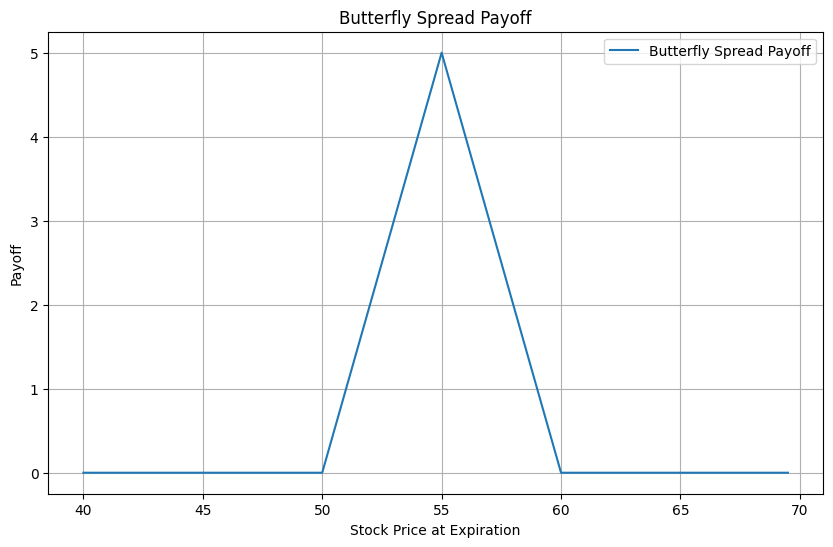

In [20]:
# Solution
S_T_range = np.arange(40, 70, 0.5)

# Butterfly spread payoff function
def butterfly_payoff(S_T, x1, x2, x3, C1, C2, C3):
    return np.maximum(S_T - x1, 0) - 2 * np.maximum(S_T - x2, 0) + np.maximum(S_T - x3, 0)

x1, x2, x3 = 50, 55, 60
C1, C2, C3 = 10, 7, 5

payoff = butterfly_payoff(S_T_range, x1, x2, x3, C1, C2, C3)

plt.figure(figsize=(10, 6))
plt.plot(S_T_range, payoff, label='Butterfly Spread Payoff')
plt.title('Butterfly Spread Payoff')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Payoff')
plt.legend()
plt.grid(True)
plt.show()

3 i.) Why might an investor enter into such a strategy? **\[2 marks\]**

In [21]:
# Solution
""" Investors might use it when they expect the price of the asset to remain near a specific strike price until expiration.
Good for investors who averse risk, through this strategy, they know their maximum profits and losses"""

' Investors might use it when they expect the price of the asset to remain near a specific strike price until expiration.\nGood for investors who averse risk, through this strategy, they know their maximum profits and losses'

## Question 4 \[13 marks\]
Suppose that you want to build a portfolio with the stocks (with tickers of) AAPL, GOOG, AMZN and META. You plan to retrieve the relevant Yahoo Finance data with the yfinance Python module from the 1st of Jan. 2017 to 1st of Nov. 2023 (inclusive).

4 a.) Calculate the daily returns of these stocks. You should use the adjusted daily closing price. **\[1 mark\]**

In [ ]:
# Solution

4 b) Based on a.), find the covariance matrix of these stocks. **\[1 mark\]**

In [ ]:
# Solution

4 c.) Suppose that the four stocks are equally weighted, find the annualised portfolio expected returns and portfolio variance. **\[2 marks\]**

In [ ]:
# Solution

4 d.) Find the efficient portfolio with the maximum Sharpe ratio. What is the corresponding Sharpe ratio? **\[2 marks\]**

In [ ]:
# Solution

4 e.) Plot the efficient frontier (Without the use of the Plotly library in Python). **\[3 mark\]**

In [ ]:
# Solution

4 f.) Based on the concept of diversification, comment on the current portfolio. How can this portfolio be improved? (Answers should be no longer than 200 words) **\[4 marks\]**

In [ ]:
# Solution

## Question 5 \[14 marks\]
A high-profile client Pam, whom you’ve built a great business relationship with over the years has asked you to quickly double-check some figures for life insurance he has received. You decide to apply the [2015 VBT Unismoke ANB/ALB](http://www.soa.org/files/research/exp-study/2015-vbt-smoker-distinct-alb-anb.xlsx), the Valuation Basic Table (VBT) to using the Age Nearest Birthday (ANB) method, with a valuation interest rate of 5.2% you submit your calculated figures to aid Pam's decision.

Today is 11 November 2023, and the type of life insurance Pam was viewing was permanent life insurance. Pam was born on 25 March 1980, with the health condition standard for her cohort of the same age and gender (Female).

5 a.) Calculate Pam’s annual unconditional survival rates $_{n}p_{x}$ from now to age 54. **\[4 marks\]**

In [ ]:
# Solution

5 b.) Calculate Pam’s life expectancy in years (to one decimal place). **\[3 marks\]**

In [ ]:
# Solution

5 c.) Calculate the probability that Pam dies exactly between 6 and 9 years from now (to five decimal places). **\[3 marks\]**

In [ ]:
# Solution

5 d.) Calculate the minimum annual premium rate (premium as a fraction of death benefit) that your company should charge for Pam's cohort (to five decimal places). **\[4 marks\]**

In [ ]:
# Solution

## Question 6 \[8 marks\]
The conglomerate you are working for, Accretion, decided to digitalize the financial analysis in order to optimize their operations. Since you have expertise in a multitude of financial instruments, you have been tasked to perform the innovation.

Firstly, you are asked to design a tool for computing the zero spot rates using the bootstrap method, and then verify its validity by applying it to Exhibit 6 below.

### Exhibit 6: Spot Rate Table
| Principal | Maturity (Years) | Coupon (per Year) | Price | Coupon Frequency | Zero Rate (Continuous) |
| --- | --- | --- | --- | --- | --- |
| 100 | 0.5 | 0 | 99.8 | 0.5 (SA) | 0.4% |
| 100 | 1 | 4 | 101.2 | 1 (A) | 2.729% |
| 100 | 1.5 | 5 | 102.4 | 0.5 (SA) | 3.353% |

- SA: Semi-annual coupon
- A: Annual coupon

6 a.) Design a function that take in the required parameters for the bootstrap method in form of a Pandas DataFrame and returns the same DataFrame but with a new column called "Zero Rates". Then, check that your function gives the correct spot rates in the table above. **\[4 mark\]**

In [2]:
spot_rate_df = pd.DataFrame([[100, 0.5, 0, 99.8, 0.5], [100, 1, 4, 101.2, 1], [100, 1.5, 5, 102.4, 0.5]],
                            columns=["Principal", "Maturity", "Coupon", "Price", "Coupon Frequency"])

def bootstrap_method(df: pd.DataFrame) -> pd.DataFrame:
    # Solution
    return df

bootstrap_method(df=spot_rate_df)

It is often that in real world investors encounter friction costs such as fees, commissions and other types of expenses. Currently, NPV is used to measure ther value of an investment opportunity:

$$NPV = C_{0} + PV.$$

Your task is to design a tool for evaluating net value of a bond, which takes into consideration accrued interest, commission fees on entrance and exit (assume there is commission for settling the return of the principal), and administrative fees, which are monthly fees associated with the exchange that keeps track of asset ownership.

6 b.) Define a python function for calculating the net value of a bond subject to accrued interest, entry and exit fees and administrative fees (assume the administrative fees are paid out at the same frequency as the coupons). The accrued interest MUST be computed from the coupon value. **\[3 marks\]**

In [1]:
def improved_npv(principal: float, coupon: float, price: float, interest_rate: float, n_periods:float, administrative_fee: float, entry_fee: float,
                 exit_fee: float, days_from_last_coupon: int, coupon_frequency_per_year: float) -> float:
    # Solution
    return

6 c.) Using the values from Exhibit 7 compute the net value of the investment. Is this a good investment considering all the expenses? **\[1 mark\]**

### Exhibit 7: Information for an Investment
| Parameter | Value |
| --- | --- |
| Principal | $100 |
| Coupon | $4 (Yearly) |
| Price | $101.5 |
| Interest Rate | 2% |
| Maturity | 3 years |
| Administrative Fee | $1 (Yearly) |
| Entry Fee | $5 |
| Exit Fee | $5 |
| Days from Last Coupon | 200 |

In [4]:
# Solution